# Automata, automata everywhere

In this dojo, algorithmics are back. The following exercises will help you create a few cellular automata with, we hope, nice visuals.

Good luck and best of skill, Station!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

## Conway's Game of Life

The most popular cellular automaton ever. The rules are:
* you have a square grid, with square *cells* that each have one of two *states*, called "live" and "dead";
* all cells have eight neighbors; if the grid is finite, we "wrap around" the boundaries (the cell "left" of the top-left corner is the top-right corner, and so on);
* from one grid, you can compute the next *iteration* of the grid by following those rules:
 * a *live* cell stays *live* if it has exactly 2 or 3 live neighbors;
 * a *dead* cell becomes *live* if it has exactly 3 live neighbors;
 * otherwise the cell remains/becomes dead.

**Your mission in this first challenge is to complete the `update_life` function that generates the next iteration of a grid.**

[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


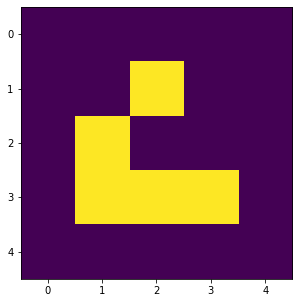

In [5]:
# Here are a few lines of code to get you started, with an example grid
a = np.zeros((5, 5), dtype=int)
a[3, 2] = 1
a[3, 3] = 1
a[3, 1] = 1
a[2, 1] = 1
a[1, 2] = 1

print(a)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(a);

In [6]:
def neighbors(grid):
  """ Returns the number of live neighbors for each cell in the grid """
  ind = np.zeros_like(grid)
  for i in (-1, 0, 1):
    for j in (-1, 0, 1):
      layer = np.roll(grid, i, axis=0)
      layer = np.roll(layer, j, axis=1)
      if i or j:
        ind += layer
  return ind

In [7]:
neighbors(a)

array([[0, 1, 1, 1, 0],
       [1, 2, 1, 1, 0],
       [2, 3, 5, 3, 1],
       [2, 2, 3, 1, 1],
       [1, 2, 3, 2, 1]])

* a *live* cell stays *live* if it has exactly 2 or 3 live neighbors;
* a *dead* cell becomes *live* if it has exactly 3 live neighbors;
* otherwise the cell remains/becomes dead.

In [8]:
def update_life(grid):
  """ Return the next iteration of the given grid
      Input: a 2D NumPy array representing the grid (0 = dead, 1 = live)
      Output: a 2D NumPy array, same format, representing its next iteration
  """

  nb_neighbors = neighbors(grid)
  new_grid = np.zeros_like(grid)

  for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
      if grid[i, j] == 0:
        if nb_neighbors[i, j] == 3:
          new_grid[i, j] = 1
      else:
        if 2 <= nb_neighbors[i, j] <= 3:
          new_grid[i, j] = 1

  return new_grid

In [9]:
update_life(a)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0]])

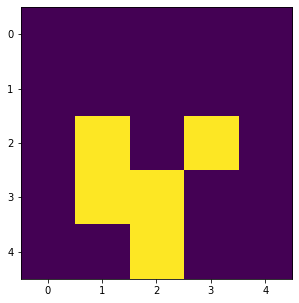

In [10]:
next_a = update_life(a)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(next_a);

In [11]:
def gen_anim(origin_grid, n_frames=100):
  """ Generate the grid animation """

  def update_anim(_, img, grid):
    """ Helper function for animation """
    next_grid = update_life(grid)
    img.set_data(next_grid)
    grid[:] = next_grid[:]
    return (img,)

  fig, ax = plt.subplots(figsize=(5, 5))
  img = ax.imshow(origin_grid)
  ani = animation.FuncAnimation(
    fig, update_anim, fargs=(img, origin_grid),
    frames=n_frames,
    interval=250)

  return HTML(ani.to_html5_video())

In [12]:
glider = np.zeros((10, 10), dtype=int)
glider[6, 2] = 1
glider[6, 3] = 1
glider[6, 1] = 1
glider[5, 1] = 1
glider[4, 2] = 1

display(gen_anim(glider))
plt.close()

If you kept the first example grid, you should see the pattern move over the grid. Now try this one, with a bigger grid (this may take a while to generate).

In [13]:
fbomb = np.zeros((30, 30), dtype=int)
fbomb[6, 12] = 1
fbomb[6, 13] = 1
fbomb[6, 11] = 1
fbomb[5, 11] = 1
fbomb[7, 12] = 1

In [14]:
display(gen_anim(fbomb, 200))
plt.close()

## Langton's Ant

Less known, with strange shapes. You still have a square grid, but now there's a small *agent*, the ant, that will "move" on the grid and make changes. The ant has a *position* and a *direction*.

The two cell states are "on" and "off". All cells are "off" at first. The ant is at the center of the grid, facing North. Then, at each iteration:
* the ant flips the cell state at its position;
* the ant moves one cell in its direction;
* the ant checks the state of its new cell:
  * if it's "on", the ant turns left;
  * if it's "off", the ant turns right.

The ant will behave in a strange way at first, but eventually a pattern appears... let's check it out!

**Your mission in this second challenge is to complete the `update_ant` function that generates the next iteration of a grid.**

In [15]:
ant_grid = np.zeros((21, 21), dtype=int)
ant_pos = (10, 10)
ant_dir = (-1, 0)

print("""
'north': (-1, 0)
'west': (0, -1)
'south': (1, 0)
'east': (0, 1)
""")


'north': (-1, 0)
'west': (0, -1)
'south': (1, 0)
'east': (0, 1)



All cells are "off" at first. The ant is at the center of the grid, facing North. Then, at each iteration:
* the ant flips the cell state at its position;
* the ant moves one cell in its direction;
* the ant checks the state of its new cell:
  * if it's "on", the ant turns left;
  * if it's "off", the ant turns right.

In [16]:
def update_ant(grid, pos, dir):
  """ Return the next iteration of the given grid+ant
      Inputs:
        * a 2D NumPy array representing the grid (0 = off, 1 = on)
        * a 2-tuple for the ant's position
        * a 2-tuple for the ant's direction
      Output: a tuple with the same as above, for the next iteration
  """

  cx, cy = pos
  dx, dy = dir

  # ant flips the cell state at its position
  if grid[cx, cy] == 0:
    grid[cx, cy] = 1
  else:
    grid[cx, cy] = 0

  # ant moves one cell in its direction
  pos = list(pos)
  pos[0] += dx
  pos[1] += dy
  cx, cy = pos
  pos = tuple(pos)

  # ant checks the state of the new cell, and changes direction
  directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
  for i, d in enumerate(directions):
    if dir == d:
      if grid[cx, cy] == 1:
        dir = directions[i-3]
        break
      else:
        dir = directions[i-1]
        break

  return grid, pos, dir

In [17]:
def gen_anim_ant(origin_grid, origin_pos, origin_dir, n_frames=100):
  """ Generate the grid animation """
  ant = {'pos': origin_pos, 'dir': origin_dir}

  def update_anim(_, img, grid, ant):
    """ Helper function for animation """
    next_grid, next_pos, next_dir = update_ant(grid, ant['pos'], ant['dir'])
    img.set_data(next_grid)
    grid[:] = next_grid[:]
    ant['pos'] = next_pos
    ant['dir'] = next_dir
    return (img,)

  fig, ax = plt.subplots(figsize=(10, 10))
  img = ax.imshow(origin_grid)
  ani = animation.FuncAnimation(
    fig, update_anim, fargs=(img, origin_grid, ant),
    frames=n_frames,
    interval=50)

  return HTML(ani.to_html5_video())

In [18]:
ant_grid = np.zeros((21, 21), dtype=int)
ant_pos = (10, 10)
ant_dir = (-1, 0)

gen_anim_ant(ant_grid, ant_pos, ant_dir, 1)
plt.close()
display(gen_anim_ant(ant_grid, ant_pos, ant_dir, 100))
plt.close()

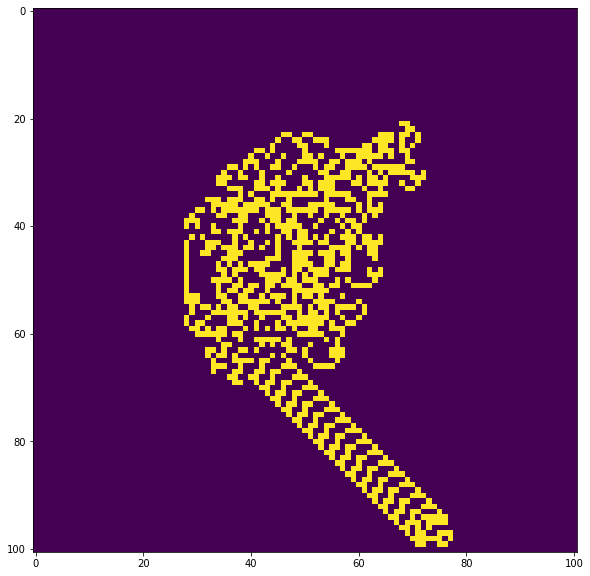

In [19]:
# If everything went well, you should see an interesting pattern here... and a few hundred steps later!
n_iter = 11600
ant_grid = np.zeros((101, 101), dtype=int)
ant_pos = (50, 50)
ant_dir = (-1, 0)

for k in range(n_iter):
  ant_grid, ant_pos, ant_dir = update_ant(ant_grid, ant_pos, ant_dir)

fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(ant_grid)
